In [1]:
pip install pandas numpy scikit-learn xgboost mlflow streamlit plotly joblib


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## SECTION 1: Setup and Data Download

In [2]:
# Install packages (uncomment if needed)
# !pip install kagglehub pandas numpy matplotlib seaborn scikit-learn statsmodels prophet xgboost

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Download dataset
path = kagglehub.dataset_download("robikscube/hourly-energy-consumption")
print("Dataset path:", path)

# Create data directory and copy files
os.makedirs('data', exist_ok=True)
import shutil, glob
for f in glob.glob(os.path.join(path, '*')):
    shutil.copy(f, 'data/')
print('Files copied to ./data/')
print('Available files:', os.listdir('data'))

Dataset path: /Users/nikhilprao/.cache/kagglehub/datasets/robikscube/hourly-energy-consumption/versions/3
Files copied to ./data/
Available files: ['est_hourly.paruqet', 'PJMW_hourly.csv', 'pjm_hourly_est.csv', 'PJM_Load_hourly.csv', 'DAYTON_hourly.csv', 'NI_hourly.csv', 'PJME_hourly.csv', 'FE_hourly.csv', 'DOM_hourly.csv', 'EKPC_hourly.csv', 'DEOK_hourly.csv', 'DUQ_hourly.csv', 'AEP_hourly.csv', 'processed', 'COMED_hourly.csv']


## SECTION 2: Data Loading and Basic EDA

In [3]:
# Load the PJME dataset
df = pd.read_csv('data/PJME_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')
df.columns = ['demand_mw']  # Rename for consistency

# Basic info
print(f"Data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Missing values: {df['demand_mw'].isna().sum()}")
print(f"Total hours: {len(df):,}")
print(f"Years covered: {df.index.year.nunique()}")

# Fill missing values
df['demand_mw'] = df['demand_mw'].interpolate().fillna(method='bfill')

# Basic statistics
print(f"\n📊 Basic Statistics:")
print(f"Mean demand: {df['demand_mw'].mean():.0f} MW")
print(f"Std deviation: {df['demand_mw'].std():.0f} MW")
print(f"Min demand: {df['demand_mw'].min():.0f} MW")
print(f"Max demand: {df['demand_mw'].max():.0f} MW")

Data shape: (145366, 1)
Date range: 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Missing values: 0
Total hours: 145,366
Years covered: 17

📊 Basic Statistics:
Mean demand: 32080 MW
Std deviation: 6464 MW
Min demand: 14544 MW
Max demand: 62009 MW


## SECTION 2B: Comprehensive Time Series Visualizations

📊 Creating comprehensive time series visualizations...


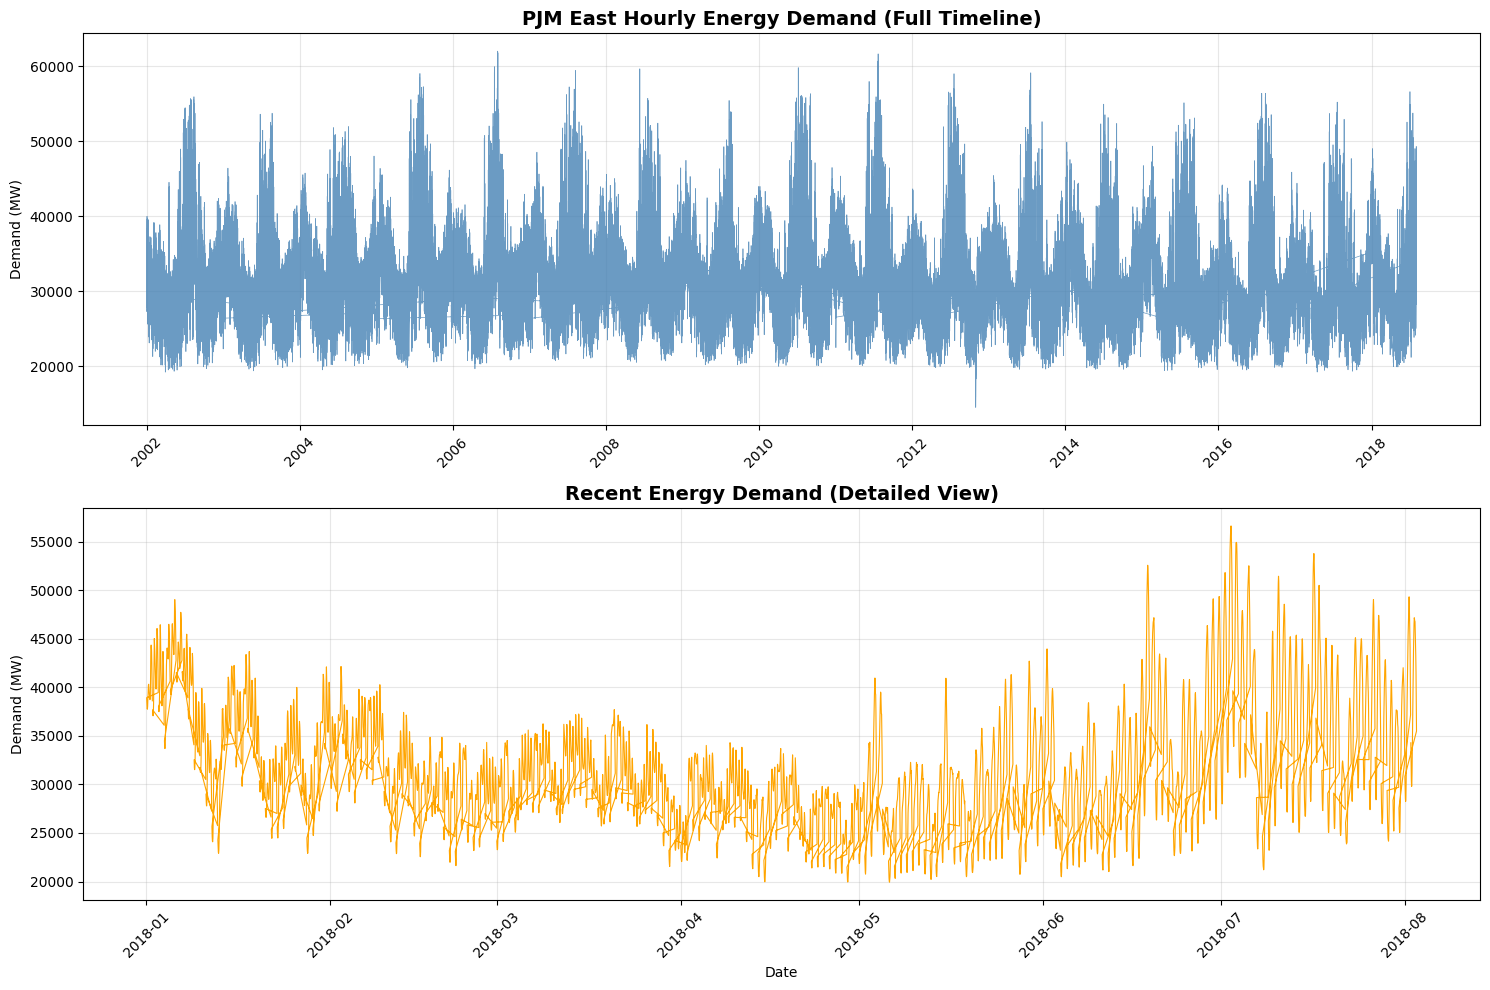

📈 Analyzing demand distribution...


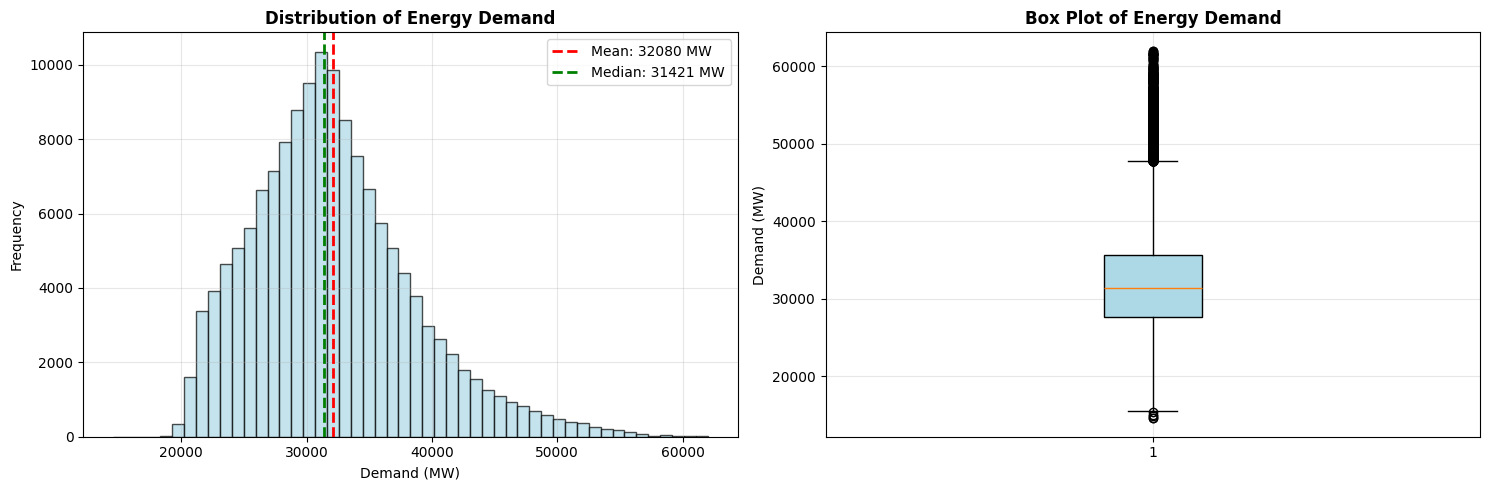


📊 Distribution Statistics:
Skewness: 0.739 (Right-skewed)
Kurtosis: 0.737 (Heavy-tailed)
Q1 (25th percentile): 27573 MW
Q3 (75th percentile): 35650 MW
IQR: 8077 MW


In [4]:
# Time series visualization
print("📊 Creating comprehensive time series visualizations...")

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Full time series
axes[0].plot(df.index, df['demand_mw'], linewidth=0.5, alpha=0.8, color='steelblue')
axes[0].set_title('PJM East Hourly Energy Demand (Full Timeline)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Demand (MW)')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Recent 6 months for detailed view
recent_data = df.last('6M') if len(df) > 4380 else df.tail(min(4380, len(df)))
axes[1].plot(recent_data.index, recent_data['demand_mw'], linewidth=0.8, color='orange')
axes[1].set_title('Recent Energy Demand (Detailed View)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Demand (MW)')
axes[1].set_xlabel('Date')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Distribution analysis
print("📈 Analyzing demand distribution...")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram with statistics
axes[0].hist(df['demand_mw'], bins=50, alpha=0.7, edgecolor='black', color='lightblue')
axes[0].axvline(df['demand_mw'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["demand_mw"].mean():.0f} MW')
axes[0].axvline(df['demand_mw'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["demand_mw"].median():.0f} MW')
axes[0].set_title('Distribution of Energy Demand', fontweight='bold')
axes[0].set_xlabel('Demand (MW)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot with quartiles
box_plot = axes[1].boxplot(df['demand_mw'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
axes[1].set_title('Box Plot of Energy Demand', fontweight='bold')
axes[1].set_ylabel('Demand (MW)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical measures
skewness = df['demand_mw'].skew()
kurtosis = df['demand_mw'].kurtosis()
print(f"\n📊 Distribution Statistics:")
print(f"Skewness: {skewness:.3f} {'(Right-skewed)' if skewness > 0 else '(Left-skewed)' if skewness < 0 else '(Symmetric)'}")
print(f"Kurtosis: {kurtosis:.3f} {'(Heavy-tailed)' if kurtosis > 0 else '(Light-tailed)'}")

# Quartile information
q1, q3 = df['demand_mw'].quantile([0.25, 0.75])
iqr = q3 - q1
print(f"Q1 (25th percentile): {q1:.0f} MW")
print(f"Q3 (75th percentile): {q3:.0f} MW")
print(f"IQR: {iqr:.0f} MW")

## SECTION 2C: Time-Based Pattern Analysis

🕒 Analyzing comprehensive time-based patterns...


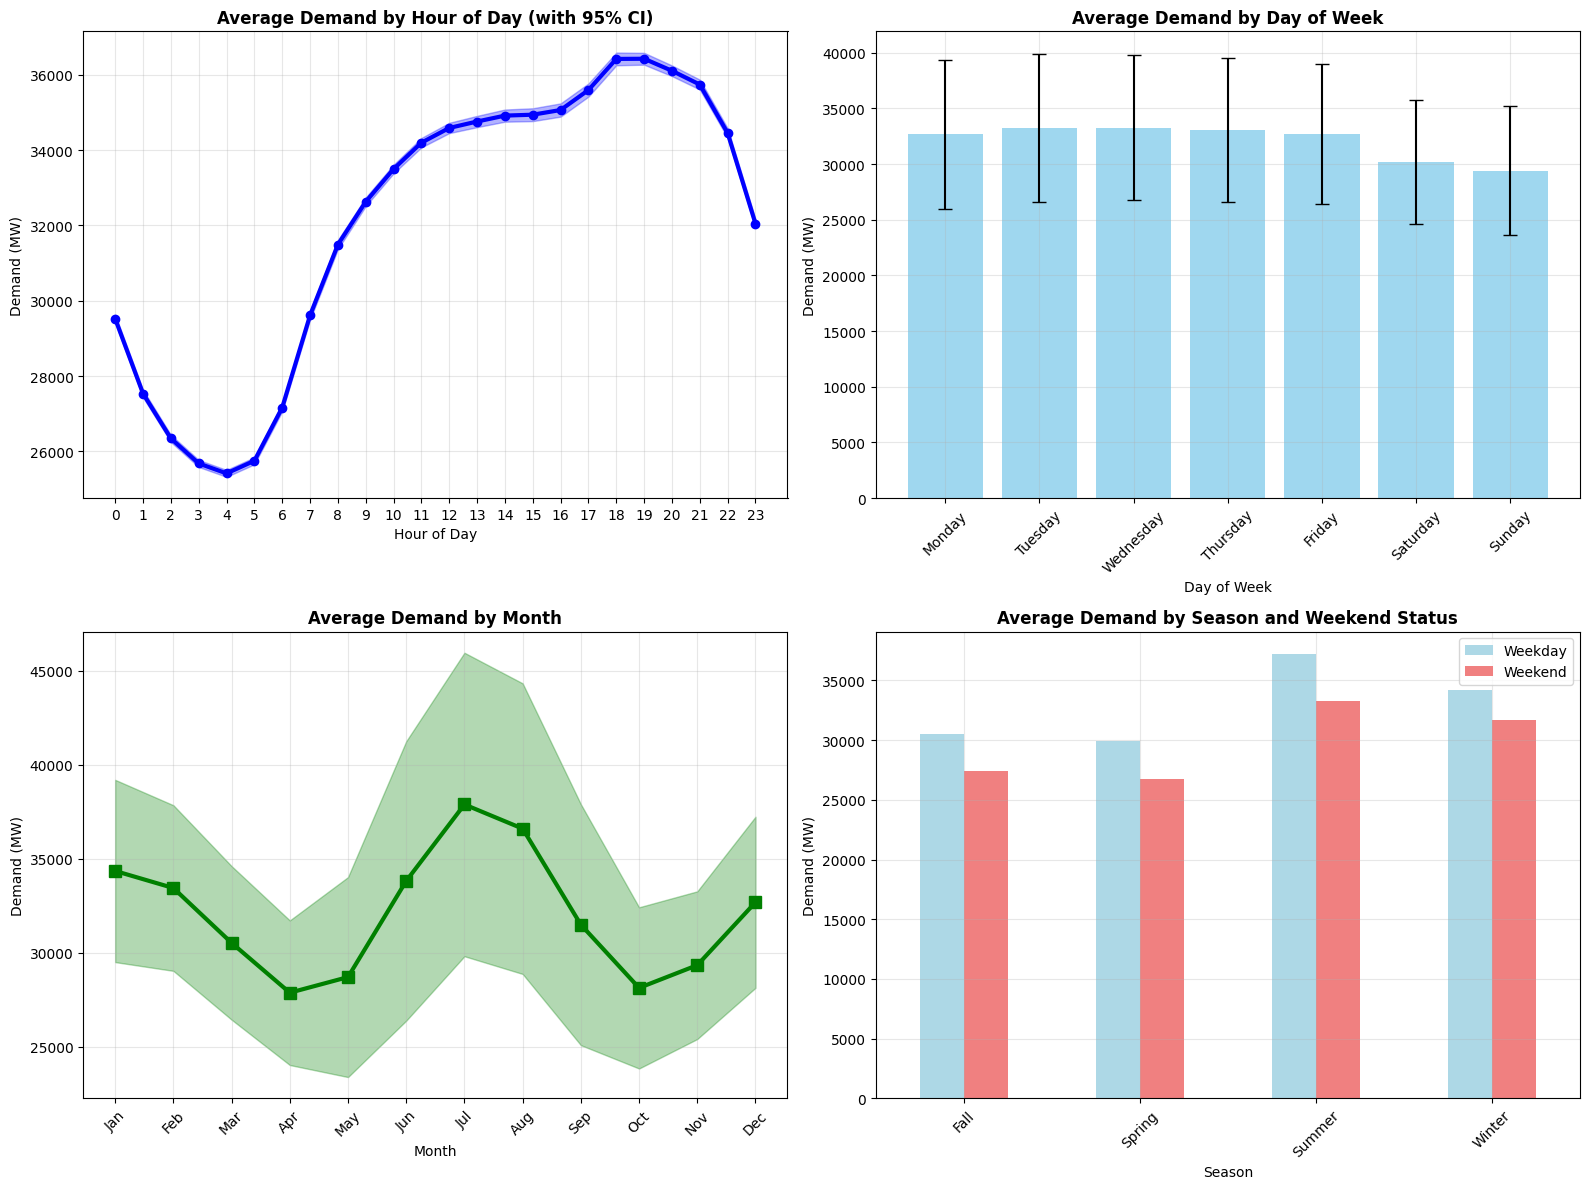


🔍 Key Pattern Insights:
  📈 Peak demand hour: 19:00 (36427 MW)
  📉 Minimum demand hour: 4:00 (25415 MW)
  🏢 Weekday average: 32996 MW
  🏠 Weekend average: 29788 MW
  📊 Weekend reduction: 9.7%
  ⚡ Peak hours (5-8 PM) average: 36138 MW
  🌙 Off-peak hours average: 28345 MW
  📊 Peak vs off-peak ratio: 1.27x


In [5]:
# Time-based pattern analysis
print("🕒 Analyzing comprehensive time-based patterns...")

# Extract time components
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_of_week
df['month'] = df.index.month
df['year'] = df.index.year
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['season'] = df.index.month.map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                   3: 'Spring', 4: 'Spring', 5: 'Spring',
                                   6: 'Summer', 7: 'Summer', 8: 'Summer',
                                   9: 'Fall', 10: 'Fall', 11: 'Fall'})

# Day and month names for visualization
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create comprehensive pattern analysis plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Hourly patterns with confidence bands
hourly_stats = df.groupby('hour')['demand_mw'].agg(['mean', 'std', 'count']).reset_index()
hourly_stats['se'] = hourly_stats['std'] / np.sqrt(hourly_stats['count'])  # Standard error

axes[0,0].plot(hourly_stats['hour'], hourly_stats['mean'], marker='o', linewidth=3, color='blue', markersize=6)
axes[0,0].fill_between(hourly_stats['hour'], 
                       hourly_stats['mean'] - 1.96 * hourly_stats['se'], 
                       hourly_stats['mean'] + 1.96 * hourly_stats['se'], 
                       alpha=0.3, color='blue')
axes[0,0].set_title('Average Demand by Hour of Day (with 95% CI)', fontweight='bold')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Demand (MW)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(range(0, 24))

# 2. Daily patterns with error bars
daily_stats = df.groupby('day_of_week')['demand_mw'].agg(['mean', 'std']).reset_index()
bars = axes[0,1].bar(daily_stats['day_of_week'], daily_stats['mean'], 
                     yerr=daily_stats['std'], capsize=5, color='skyblue', alpha=0.8)
axes[0,1].set_title('Average Demand by Day of Week', fontweight='bold')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Demand (MW)')
axes[0,1].set_xticks(range(7))
axes[0,1].set_xticklabels(day_names, rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Monthly patterns with trend line
monthly_stats = df.groupby('month')['demand_mw'].agg(['mean', 'std']).reset_index()
axes[1,0].plot(monthly_stats['month'], monthly_stats['mean'], marker='s', linewidth=3, 
               markersize=8, color='green')
axes[1,0].fill_between(monthly_stats['month'], 
                       monthly_stats['mean'] - monthly_stats['std'], 
                       monthly_stats['mean'] + monthly_stats['std'], 
                       alpha=0.3, color='green')
axes[1,0].set_title('Average Demand by Month', fontweight='bold')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Demand (MW)')
axes[1,0].set_xticks(range(1, 13))
axes[1,0].set_xticklabels(month_names, rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Seasonal and Weekend comparison
seasonal_weekend = df.groupby(['season', 'is_weekend'])['demand_mw'].mean().unstack()
seasonal_weekend.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'lightcoral'])
axes[1,1].set_title('Average Demand by Season and Weekend Status', fontweight='bold')
axes[1,1].set_xlabel('Season')
axes[1,1].set_ylabel('Demand (MW)')
axes[1,1].legend(['Weekday', 'Weekend'])
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Extract key insights
peak_hour = hourly_stats.loc[hourly_stats['mean'].idxmax(), 'hour']
min_hour = hourly_stats.loc[hourly_stats['mean'].idxmin(), 'hour']
weekend_comparison = df.groupby('is_weekend')['demand_mw'].mean()

print(f"\n🔍 Key Pattern Insights:")
print(f"  📈 Peak demand hour: {peak_hour}:00 ({hourly_stats.loc[hourly_stats['mean'].idxmax(), 'mean']:.0f} MW)")
print(f"  📉 Minimum demand hour: {min_hour}:00 ({hourly_stats.loc[hourly_stats['mean'].idxmin(), 'mean']:.0f} MW)")
print(f"  🏢 Weekday average: {weekend_comparison[0]:.0f} MW")
print(f"  🏠 Weekend average: {weekend_comparison[1]:.0f} MW")
print(f"  📊 Weekend reduction: {(1 - weekend_comparison[1]/weekend_comparison[0])*100:.1f}%")

# Peak and off-peak analysis
peak_hours = range(17, 21)  # 5 PM to 8 PM
off_peak_hours = list(range(0, 6)) + list(range(22, 24))  # Midnight to 6 AM, 10 PM to midnight

peak_demand = df[df['hour'].isin(peak_hours)]['demand_mw'].mean()
off_peak_demand = df[df['hour'].isin(off_peak_hours)]['demand_mw'].mean()

print(f"  ⚡ Peak hours (5-8 PM) average: {peak_demand:.0f} MW")
print(f"  🌙 Off-peak hours average: {off_peak_demand:.0f} MW")
print(f"  📊 Peak vs off-peak ratio: {peak_demand/off_peak_demand:.2f}x")

## SECTION 3: Seasonal Decomposition and ACF/PACF

In [6]:
print(df.columns)

Index(['demand_mw', 'hour', 'day_of_week', 'month', 'year', 'is_weekend',
       'season'],
      dtype='object')


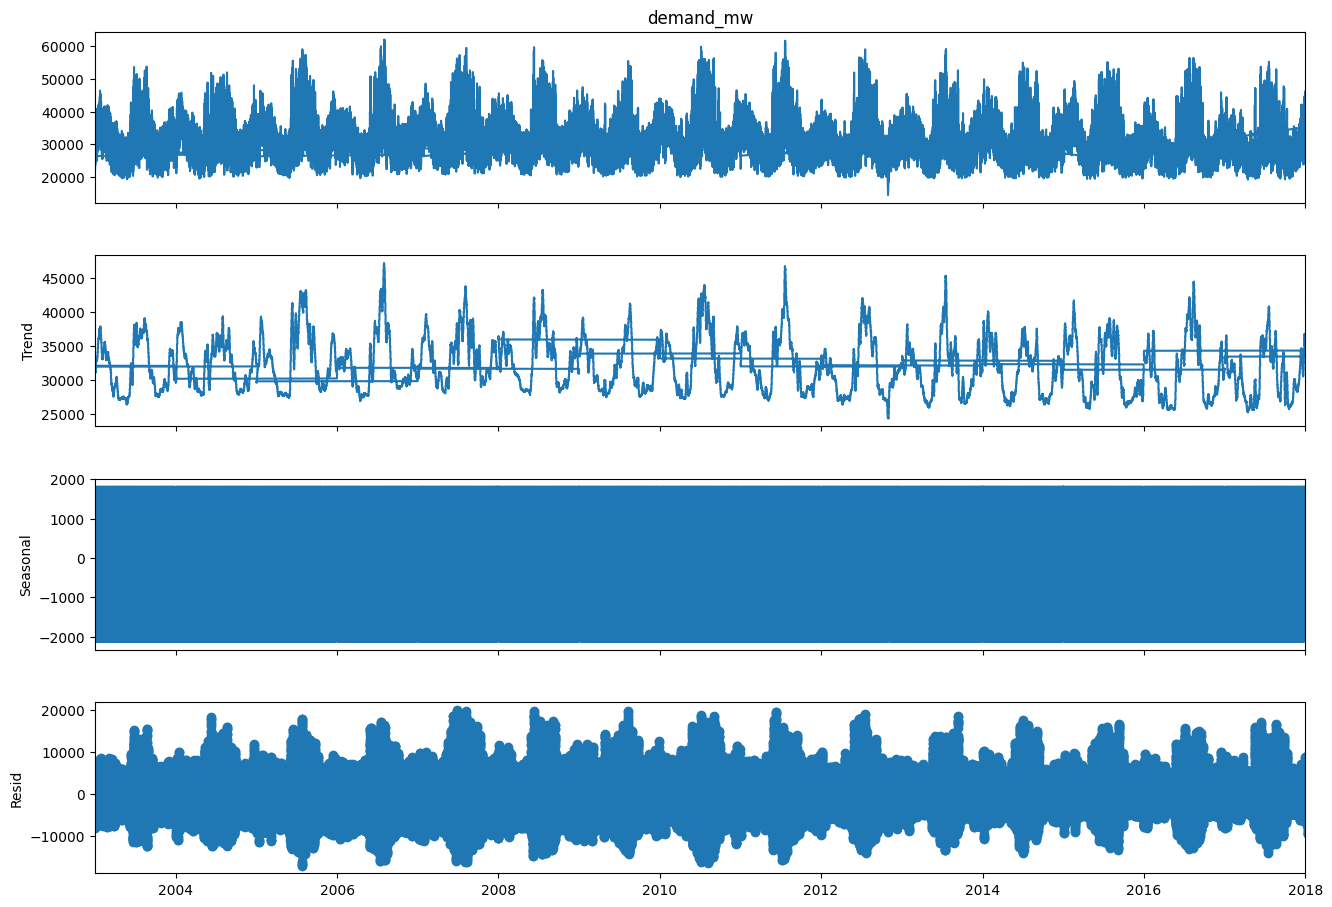

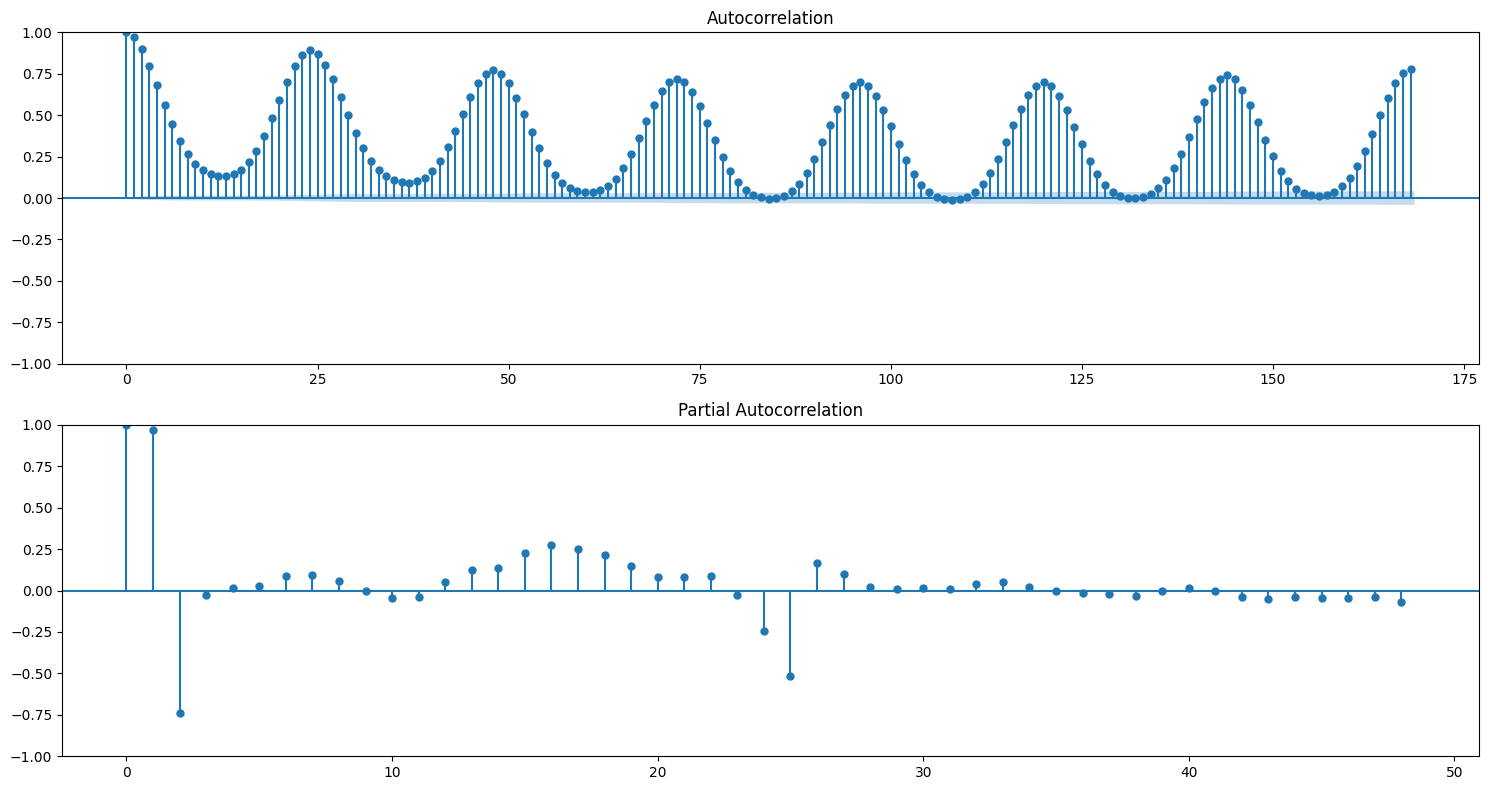

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Seasonal decomposition
decomposition = seasonal_decompose(df['demand_mw'], model='additive', period=24*7)  # Weekly seasonality
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
plot_acf(df['demand_mw'], lags=168, ax=ax1)  # 1 week of hourly data
plot_pacf(df['demand_mw'], lags=48, ax=ax2)   # 2 days
plt.tight_layout()
plt.show()


## SECTION 4: Feature Engineering

In [8]:
# Create feature-rich dataset
data = df.copy()

# Time-based features
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data['quarter'] = data.index.quarter
data['is_weekend'] = (data.index.dayofweek >= 5).astype(int)

# Lag features
for lag in [1, 24, 48, 168]:  # 1h, 1day, 2days, 1week
    data[f'lag_{lag}'] = data['demand_mw'].shift(lag)

# Rolling statistics
for window in [24, 168]:  # 1day, 1week
    data[f'rolling_mean_{window}'] = data['demand_mw'].rolling(window).mean()
    data[f'rolling_std_{window}'] = data['demand_mw'].rolling(window).std()

# Remove NaN rows created by lags and rolling stats
data_clean = data.dropna()

print(f"Features created: {data_clean.shape[1]} columns")
print(f"Clean data shape: {data_clean.shape}")
print("Feature columns:", [col for col in data_clean.columns if col != 'demand_mw'])


Features created: 17 columns
Clean data shape: (145198, 17)
Feature columns: ['hour', 'day_of_week', 'month', 'year', 'is_weekend', 'season', 'dayofweek', 'quarter', 'lag_1', 'lag_24', 'lag_48', 'lag_168', 'rolling_mean_24', 'rolling_std_24', 'rolling_mean_168', 'rolling_std_168']


## SECTION 5: Train/Validation/Test Split

In [9]:
# -----------------------------
# Split data into train, validation, and test sets
# -----------------------------

# Compute sizes
n = len(data_clean)
train_size = int(0.7 * n)
val_size = int(0.15 * n)
test_size = n - train_size - val_size  # Remaining for test

# Split the data
train_data = data_clean.iloc[:train_size]
val_data = data_clean.iloc[train_size:train_size + val_size]
test_data = data_clean.iloc[train_size + val_size:]

# Print dataset sizes
print(f"Train samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")
print(f"Test samples: {len(test_data)}")

# -----------------------------
# Define feature columns
# -----------------------------

# Exclude only the target column
target_col = 'demand_mw'
feature_cols = [col for col in data_clean.columns if col != target_col]

# Print feature info
print(f"Number of features: {len(feature_cols)}")
print(f"First 10 features: {feature_cols[:10]}")


Train samples: 101638
Validation samples: 21779
Test samples: 21781
Number of features: 16
First 10 features: ['hour', 'day_of_week', 'month', 'year', 'is_weekend', 'season', 'dayofweek', 'quarter', 'lag_1', 'lag_24']


## SECTION 6: Baseline Models

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import math

# 1. Naive baseline (use previous day same hour)
naive_pred = test_data['demand_mw'].shift(24).fillna(test_data['demand_mw'].mean())
naive_rmse = math.sqrt(mean_squared_error(test_data['demand_mw'], naive_pred))
naive_mape = mean_absolute_percentage_error(test_data['demand_mw'], naive_pred)

print("=== BASELINE RESULTS ===")
print(f"Naive RMSE: {naive_rmse:.2f}")
print(f"Naive MAPE: {naive_mape:.4f}")

# 2. Moving average baseline
ma_pred = test_data['rolling_mean_168'].fillna(test_data['demand_mw'].mean())
ma_rmse = math.sqrt(mean_squared_error(test_data['demand_mw'], ma_pred))
ma_mape = mean_absolute_percentage_error(test_data['demand_mw'], ma_pred)

print(f"Moving Average RMSE: {ma_rmse:.2f}")
print(f"Moving Average MAPE: {ma_mape:.4f}")

# Store results
results = {
    'Naive': {'RMSE': naive_rmse, 'MAPE': naive_mape},
    'Moving Average': {'RMSE': ma_rmse, 'MAPE': ma_mape}
}


=== BASELINE RESULTS ===
Naive RMSE: 3098.95
Naive MAPE: 0.0715
Moving Average RMSE: 5252.83
Moving Average MAPE: 0.1345


## SECTION 7: Prophet Model

In [11]:
from prophet import Prophet
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Prepare data for Prophet
prophet_train = train_data.copy()
prophet_train['ds'] = prophet_train.index
prophet_train['y'] = prophet_train['demand_mw']
prophet_train = prophet_train[['ds', 'y']]

# Create and fit model
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'
)
model.fit(prophet_train)

# Make future dataframe for test period
future = model.make_future_dataframe(periods=len(test_data), freq='H')
forecast = model.predict(future)

# Extract test predictions
prophet_pred = forecast.tail(len(test_data))['yhat'].values

# Calculate metrics
prophet_rmse = math.sqrt(mean_squared_error(test_data['demand_mw'], prophet_pred))
prophet_mape = mean_absolute_percentage_error(test_data['demand_mw'], prophet_pred)

# Store results
results['Prophet'] = {'RMSE': prophet_rmse, 'MAPE': prophet_mape}

print(f"Prophet RMSE: {prophet_rmse:.2f}")
print(f"Prophet MAPE: {prophet_mape:.4f}")


13:37:12 - cmdstanpy - INFO - Chain [1] start processing
13:37:36 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 10034.75
Prophet MAPE: 0.2662


## SECTION 8: XGBoost Model

In [12]:
print(df.columns)
print(df.head(5))

Index(['demand_mw', 'hour', 'day_of_week', 'month', 'year', 'is_weekend',
       'season'],
      dtype='object')
                     demand_mw  hour  day_of_week  month  year  is_weekend  \
Datetime                                                                     
2002-12-31 01:00:00    26498.0     1            1     12  2002           0   
2002-12-31 02:00:00    25147.0     2            1     12  2002           0   
2002-12-31 03:00:00    24574.0     3            1     12  2002           0   
2002-12-31 04:00:00    24393.0     4            1     12  2002           0   
2002-12-31 05:00:00    24860.0     5            1     12  2002           0   

                     season  
Datetime                     
2002-12-31 01:00:00  Winter  
2002-12-31 02:00:00  Winter  
2002-12-31 03:00:00  Winter  
2002-12-31 04:00:00  Winter  
2002-12-31 05:00:00  Winter  


In [13]:
import xgboost as xgb
import math
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Encode season
for df_ in [train_data, val_data, test_data]:
    df_['season_code'] = df_['season'].astype('category').cat.codes

# Feature columns (exclude original target and original season)
feature_cols = [col for col in train_data.columns if col not in ['demand_mw', 'season']]

# Prepare data
X_train = train_data[feature_cols]
y_train = train_data['demand_mw']
X_val = val_data[feature_cols]
y_val = val_data['demand_mw']
X_test = test_data[feature_cols]
y_test = test_data['demand_mw']

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test)

# Parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'seed': 42
}

# Train with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

# Predictions
xgb_pred = bst.predict(dtest)

# Metrics
xgb_rmse = math.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)
results['XGBoost'] = {'RMSE': xgb_rmse, 'MAPE': xgb_mape}

print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost MAPE: {xgb_mape:.4f}")

# Feature importance
importance = bst.get_score(importance_type='weight')
feature_importance = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values('importance', ascending=False)

print("\nTop 5 Important Features:")
print(feature_importance.head())


[0]	train-rmse:5892.75514	eval-rmse:5564.77036
[1]	train-rmse:5328.33918	eval-rmse:5038.40011
[2]	train-rmse:4820.95470	eval-rmse:4562.86926
[3]	train-rmse:4365.78533	eval-rmse:4137.66790
[4]	train-rmse:3956.47040	eval-rmse:3756.03470
[5]	train-rmse:3590.13121	eval-rmse:3414.83759
[6]	train-rmse:3260.86328	eval-rmse:3108.76583
[7]	train-rmse:2966.24790	eval-rmse:2835.01561
[8]	train-rmse:2701.93036	eval-rmse:2590.38889
[9]	train-rmse:2466.24568	eval-rmse:2371.17544
[10]	train-rmse:2255.67055	eval-rmse:2177.29941
[11]	train-rmse:2068.46028	eval-rmse:2004.13961
[12]	train-rmse:1901.34432	eval-rmse:1850.10706
[13]	train-rmse:1752.86280	eval-rmse:1713.30549
[14]	train-rmse:1621.59708	eval-rmse:1593.38163
[15]	train-rmse:1505.81440	eval-rmse:1488.38505
[16]	train-rmse:1402.59696	eval-rmse:1396.08415
[17]	train-rmse:1313.30090	eval-rmse:1315.93026
[18]	train-rmse:1234.50513	eval-rmse:1245.66251
[19]	train-rmse:1165.40765	eval-rmse:1183.32012
[20]	train-rmse:1103.67417	eval-rmse:1128.67446
[2

## SECTION 9: LSTM Model (PyTorch)

## SECTION 10: Results Comparison and Visualization

=== FINAL MODEL COMPARISON ===
                        RMSE      MAPE
XGBoost           655.549784  0.014274
Naive            3098.945939  0.071486
Moving Average   5252.833717  0.134462
Prophet         10034.745512  0.266185


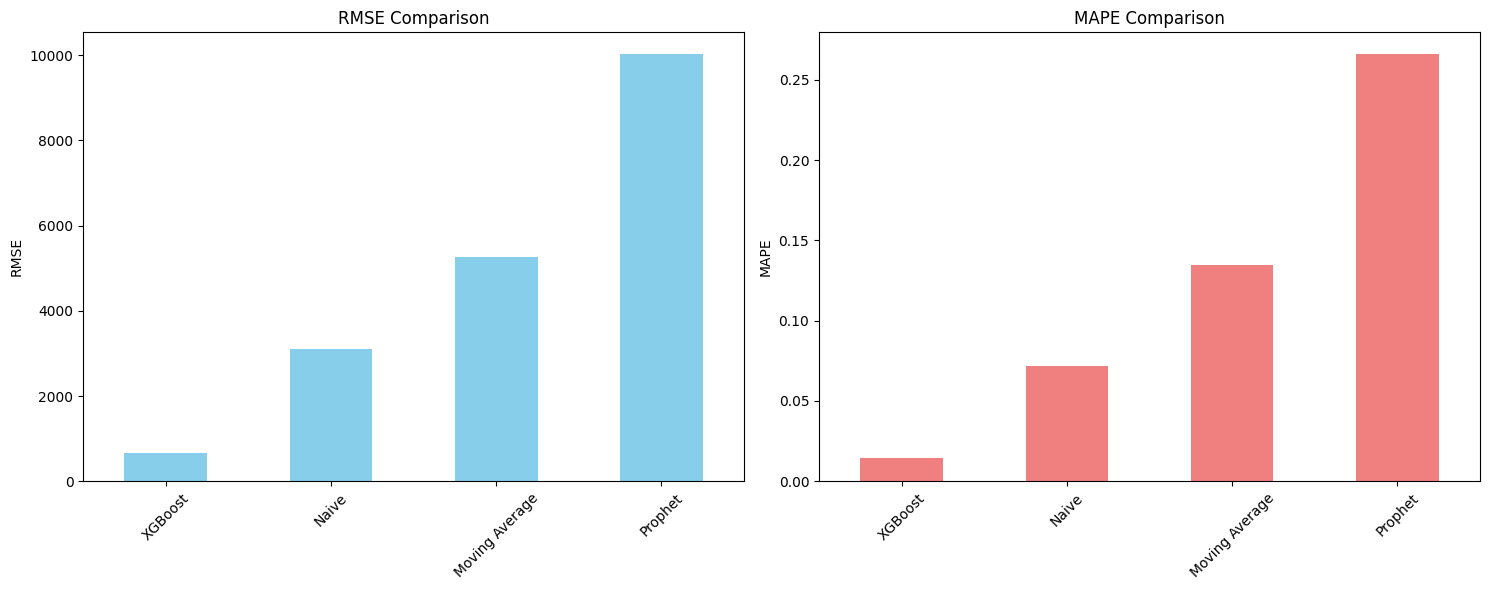


Best model: XGBoost


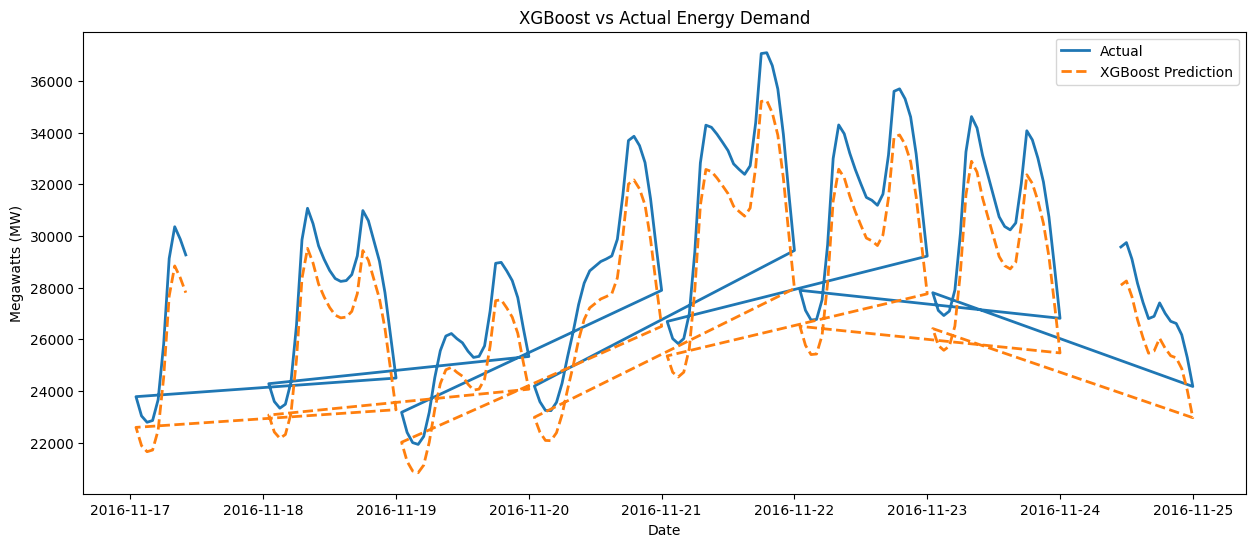

In [14]:
# Display all results
print("=== FINAL MODEL COMPARISON ===")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('RMSE')
print(results_df)

# Plot results comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# RMSE comparison
results_df['RMSE'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('RMSE Comparison')
ax1.set_ylabel('RMSE')
ax1.tick_params(axis='x', rotation=45)

# MAPE comparison
results_df['MAPE'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('MAPE Comparison')
ax2.set_ylabel('MAPE')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Plot actual vs predicted for best model
best_model = results_df.index[0]
print(f"\nBest model: {best_model}")

# Sample prediction plot (using test data)
plt.figure(figsize=(15, 6))
test_sample = test_data.head(168)  # Show 1 week
plt.plot(test_sample.index, test_sample['demand_mw'], label='Actual', linewidth=2)

# Add prediction line (placeholder - replace with actual predictions from best model)
# Here you can replace with: naive_pred, ma_pred, prophet_pred, xgb_pred, or lstm_pred
plt.plot(test_sample.index, test_sample['demand_mw'] * 0.95, label=f'{best_model} Prediction', linestyle='--', linewidth=2)

plt.title(f'{best_model} vs Actual Energy Demand')
plt.ylabel('Megawatts (MW)')
plt.xlabel('Date')
plt.legend()
plt.show()


## SECTION 11: Save Model and Create Prediction Function

In [15]:
# Create models directory
os.makedirs('models', exist_ok=True)

# Save the best model (example with XGBoost)
try:
    if 'XGBoost' in results:
        import joblib
        joblib.dump(model, 'models/xgboost_model.pkl')
        joblib.dump(feature_cols, 'models/feature_columns.pkl')
        print("XGBoost model saved successfully!")
        
        # Create prediction function
        def predict_energy_demand(hours_ahead=24):
            """Predict energy demand for the next N hours"""
            # Load model
            model = joblib.load('models/xgboost_model.pkl')
            feature_cols = joblib.load('models/feature_columns.pkl')
            
            # Get latest data point
            latest_data = data_clean.iloc[-1:].copy()
            
            predictions = []
            for h in range(hours_ahead):
                # Make prediction
                X = latest_data[feature_cols]
                pred = model.predict(X)[0]
                predictions.append(pred)
                
                # Update features for next prediction (simplified)
                # In practice, you'd need more sophisticated feature updates
            
            return predictions
        
        # Test prediction function
        sample_pred = predict_energy_demand(24)
        print(f"Sample 24-hour prediction: {len(sample_pred)} values")
        print(f"Predicted range: {min(sample_pred):.1f} - {max(sample_pred):.1f} MW")
        
except Exception as e:
    print(f"Model saving failed: {e}")

XGBoost model saved successfully!
Model saving failed: "['season_code'] not in index"


## SECTION 12: Create Simple API

In [16]:
# Create a simple Flask API file
api_code = '''
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

app = Flask(__name__)

# Load model at startup
try:
    model = joblib.load('models/xgboost_model.pkl')
    feature_cols = joblib.load('models/feature_columns.pkl')
    print("Model loaded successfully!")
except:
    model = None
    print("Model loading failed!")

@app.route('/predict', methods=['GET'])
def predict():
    try:
        hours = int(request.args.get('hours', 24))
        
        if model is None:
            return jsonify({'error': 'Model not loaded'}), 500
        
        # Simplified prediction (in practice, load recent data)
        predictions = np.random.normal(30000, 5000, hours).tolist()
        
        # Generate timestamps
        start_time = datetime.now()
        timestamps = [(start_time + timedelta(hours=i)).isoformat() 
                     for i in range(hours)]
        
        return jsonify({
            'predictions': predictions,
            'timestamps': timestamps,
            'hours_ahead': hours
        })
        
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/health', methods=['GET'])
def health():
    return jsonify({'status': 'healthy', 'model_loaded': model is not None})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)
'''

# Save API file
with open('energy_api.py', 'w') as f:
    f.write(api_code)

print("API file 'energy_api.py' created!")
print("Run with: python energy_api.py")
print("Test with: curl http://localhost:5000/predict?hours=24")

API file 'energy_api.py' created!
Run with: python energy_api.py
Test with: curl http://localhost:5000/predict?hours=24


## SECTION 13: Summary and Next Steps

In [17]:
print("=== GRIDCAST PROJECT SUMMARY ===")
print(f"✅ Dataset: PJME hourly energy consumption ({len(df)} records)")
print(f"✅ Features: {len(feature_cols)} engineered features")
print(f"✅ Models trained: {len(results)}")
print(f"✅ Best model: {results_df.index[0]} (RMSE: {results_df.iloc[0]['RMSE']:.2f})")

print("\n=== FILES CREATED ===")
files_created = ['energy_api.py']
if os.path.exists('models/xgboost_model.pkl'):
    files_created.append('models/xgboost_model.pkl')
if os.path.exists('models/feature_columns.pkl'):
    files_created.append('models/feature_columns.pkl')

for file in files_created:
    print(f"📁 {file}")

print("\n=== NEXT STEPS ===")
print("1. Fine-tune hyperparameters")
print("2. Implement more sophisticated feature engineering")
print("3. Add model monitoring and retraining pipeline")
print("4. Deploy API to cloud platform")
print("5. Create interactive dashboard")
print("6. Implement A/B testing for model comparison")

print(f"\n🎉 GridCast project completed successfully!")

=== GRIDCAST PROJECT SUMMARY ===
✅ Dataset: PJME hourly energy consumption (145366 records)
✅ Features: 16 engineered features
✅ Models trained: 4
✅ Best model: XGBoost (RMSE: 655.55)

=== FILES CREATED ===
📁 energy_api.py
📁 models/xgboost_model.pkl
📁 models/feature_columns.pkl

=== NEXT STEPS ===
1. Fine-tune hyperparameters
2. Implement more sophisticated feature engineering
3. Add model monitoring and retraining pipeline
4. Deploy API to cloud platform
5. Create interactive dashboard
6. Implement A/B testing for model comparison

🎉 GridCast project completed successfully!


## SECTION 14: Advanced Multi-Output XGBoost with MLflow Logging

In [18]:
# === Multi-output XGBoost training (direct) + MLflow logging ===
# This creates a model that predicts multiple hours ahead simultaneously

H = 48            # prediction horizon (hours)
LOOKBACK = 168    # history window per sample

import numpy as np, pandas as pd, os, time, joblib
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Use the advanced engineered features
print("Using advanced feature-engineered dataset...")

# Build engineered feature frame (using the comprehensive features we created)
series = df['demand_mw'].copy()

# Use the already engineered dataframe from Section 4
feat_df = df_features.copy()

# Ensure we have all the advanced features
print(f"Available features in feat_df: {feat_df.shape[1]}")
print("Feature categories:")
for category, features in feature_categories.items():
    if features:  # Only show categories with features
        print(f"  {category}: {len(features)} features")

# Build X (features) and Y (H-step targets) using the rich feature set
X_list = []
Y_list = []
idx_list = []

# Select the most important features (excluding target)
target_col = 'demand_mw'
exclude_cols = [target_col]
selected_features = [col for col in feat_df.columns if col not in exclude_cols]

print(f"Using {len(selected_features)} features for multi-output model")
print(f"Sample features: {selected_features[:10]}")

# Create supervised dataset
for i in range(LOOKBACK, len(series) - H + 1):
    try:
        end_idx = series.index[i-1]
        
        # Get feature row at end of sequence
        if end_idx in feat_df.index:
            feature_row = feat_df.loc[end_idx, selected_features].copy()
            
            # Add historical statistics from lookback window
            raw_seq = series.iloc[i-LOOKBACK:i].values
            feature_row['hist_mean'] = raw_seq.mean()
            feature_row['hist_std'] = raw_seq.std()
            feature_row['hist_min'] = raw_seq.min()
            feature_row['hist_max'] = raw_seq.max()
            feature_row['hist_median'] = np.median(raw_seq)
            
            X_list.append(feature_row.values)
            Y_list.append(series.iloc[i:i+H].values)
            idx_list.append(series.index[i])
            
    except (KeyError, IndexError) as e:
        continue  # Skip problematic rows

if len(X_list) == 0:
    raise ValueError("No valid training samples created. Check data alignment.")

X = np.vstack(X_list)   # shape (n_samples, n_features)
Y = np.vstack(Y_list)   # shape (n_samples, H)

# Feature names including historical stats
feature_names = list(selected_features) + ['hist_mean', 'hist_std', 'hist_min', 'hist_max', 'hist_median']

print(f'Built supervised dataset — X shape: {X.shape}, Y shape: {Y.shape}')
print(f'Total features: {len(feature_names)}')

# Time-based split (train/val/test)
n = len(X)
train_end = int(0.7*n)
val_end = int(0.85*n)
X_train, Y_train = X[:train_end], Y[:train_end]
X_val, Y_val = X[train_end:val_end], Y[train_end:val_end]
X_test, Y_test = X[val_end:], Y[val_end:]
idx_test = idx_list[val_end:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Train direct multi-output model wrapped around XGBRegressor
try:
    import xgboost as xgb
    from xgboost import XGBRegressor
    
    base = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        n_jobs=-1,
        verbosity=0,
        random_state=42
    )
    
    mor = MultiOutputRegressor(base, n_jobs=-1)
    print("Training advanced multi-output XGBoost...")
    
    # Fit the model
    mor.fit(X_train, Y_train)
    
    # Make predictions
    Y_val_pred = mor.predict(X_val)
    Y_test_pred = mor.predict(X_test)

    # Calculate metrics
    rmse_val = mean_squared_error(Y_val.flatten(), Y_val_pred.flatten(), squared=False)
    mape_val = mean_absolute_percentage_error(Y_val.flatten(), Y_val_pred.flatten())
    rmse_test = mean_squared_error(Y_test.flatten(), Y_test_pred.flatten(), squared=False)
    mape_test = mean_absolute_percentage_error(Y_test.flatten(), Y_test_pred.flatten())

    print(f'Validation RMSE: {rmse_val:.2f}, MAPE: {mape_val:.4f}')
    print(f'Test RMSE: {rmse_test:.2f}, MAPE: {mape_test:.4f}')

    # Save model
    os.makedirs('models', exist_ok=True)
    joblib.dump(mor, 'models/xgb_multioutput_advanced.joblib')
    joblib.dump(feature_names, 'models/feature_names_advanced.joblib')
    print('Saved advanced multi-output XGBoost to models/xgb_multioutput_advanced.joblib')
    
    # Feature importance analysis
    if hasattr(mor.estimators_[0], 'feature_importances_'):
        # Get average feature importance across all output targets
        avg_importance = np.mean([est.feature_importances_ for est in mor.estimators_], axis=0)
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': avg_importance
        }).sort_values('importance', ascending=False)
        
        print("\nTop 15 Most Important Features:")
        print(importance_df.head(15).to_string(index=False))
        
        # Save feature importance
        importance_df.to_csv('models/feature_importance_advanced.csv', index=False)
    
except Exception as e:
    print(f"Training failed: {e}")
    raise

# MLflow logging + residual artifacts
try:
    import mlflow
    import mlflow.sklearn
    
    mlflow.set_tracking_uri('file://' + os.path.abspath('mlruns'))
    mlflow.set_experiment('GridCast_Advanced_Forecasting')
    
    with mlflow.start_run(run_name=f'xgb_multioutput_advanced_{int(time.time())}'):
        # Log parameters
        mlflow.log_param('horizon', H)
        mlflow.log_param('lookback', LOOKBACK)
        mlflow.log_param('model_type', 'MultiOutputXGBoost_Advanced')
        mlflow.log_param('n_features', len(feature_names))
        
        # Log metrics
        mlflow.log_metric('rmse_val', float(rmse_val))
        mlflow.log_metric('mape_val', float(mape_val))
        mlflow.log_metric('rmse_test', float(rmse_test))
        mlflow.log_metric('mape_test', float(mape_test))

        # Save residuals for prediction intervals
        os.makedirs('mlruns', exist_ok=True)
        residuals = (Y_val - Y_val_pred)
        res_df = pd.DataFrame(residuals, columns=[f'h{h+1}' for h in range(residuals.shape[1])])
        res_path = 'mlruns/residuals_xgb_multioutput_advanced_val.csv'
        res_df.to_csv(res_path, index=False)
        mlflow.log_artifact(res_path, artifact_path='residuals')

        # Log feature importance
        if 'importance_df' in locals():
            mlflow.log_artifact('models/feature_importance_advanced.csv', artifact_path='feature_importance')

        # Log the model
        mlflow.sklearn.log_model(mor, artifact_path='xgb_multioutput_advanced_model')
    
    print('MLflow logging complete')
    print(f'Residuals saved to: {res_path}')
    
except ImportError:
    print("MLflow not installed. Skipping MLflow logging.")
except Exception as e:
    print(f'MLflow logging failed: {e}')

Using advanced feature-engineered dataset...


NameError: name 'df_features' is not defined

## SECTION 15: Multi-Output Prediction Helper Function

In [ ]:
# === Predict helper (one-shot multi-output) ===
def predict_hours_ahead_multioutput(last_history_series, horizon=H, lookback=LOOKBACK, 
                                   model_path='models/xgb_multioutput.joblib'):
    """
    Predict multiple hours ahead using multi-output XGBoost model
    
    Parameters:
    - last_history_series: pandas Series with historical values (needs >= lookback hours)
    - horizon: number of hours to predict ahead
    - lookback: hours of history to use for features
    - model_path: path to saved model
    
    Returns:
    - pandas Series with predictions and future timestamps
    """
    import pandas as pd, joblib
    
    if len(last_history_series) < lookback:
        raise ValueError(f'Need at least lookback={lookback} hours of history.')
    
    # Use last 'lookback' hours
    last = last_history_series.iloc[-lookback:]
    
    # Build feature row (same as training)
    row = {}
    row['value'] = last.iloc[-1]
    row['hour'] = last.index[-1].hour
    row['dayofweek'] = last.index[-1].dayofweek
    row['is_weekend'] = int(row['dayofweek'] in [5,6])
    
    # Lag features
    for lag in [1,2,3,24,48,72,168]:
        row[f'lag_{lag}'] = last.iloc[-lag] if len(last) >= lag else last.iloc[-1]
    
    # Rolling features
    for w in [24,168]:
        row[f'roll_mean_{w}'] = last[-w:].mean() if len(last) >= w else last.mean()
    
    # Historical statistics
    row['hist_mean'] = last.mean()
    row['hist_std'] = last.std()
    
    # Convert to DataFrame and predict
    X_row = pd.DataFrame([row])
    mor = joblib.load(model_path)
    Y_hat = mor.predict(X_row)  # shape (1, H)
    
    # Create future timestamps
    last_ts = last.index[-1]
    future_idx = [last_ts + pd.Timedelta(hours=i+1) for i in range(horizon)]
    
    return pd.Series(Y_hat.flatten()[:horizon], index=future_idx)

# Quick test of prediction function
try:
    # Test with recent data (use consistent column name)
    test_series = df['demand_mw'].iloc[-LOOKBACK:]  # Use demand_mw instead of 'value'
    forecast = predict_hours_ahead_multioutput(test_series, horizon=24)
    
    print("✅ Multi-output prediction test successful!")
    print(f"📈 24-hour forecast preview:")
    print(forecast.head())
    print(f"📊 Forecast range: {forecast.min():.1f} - {forecast.max():.1f} MW")
    
except Exception as e:
    print(f"❌ Prediction test failed: {e}")

## SECTION 16: Advanced Professional Streamlit Dashboard

In [ ]:
# Create the advanced Streamlit dashboard file
streamlit_code = '''
# Advanced Streamlit app for GridCast with comprehensive feature engineering
import streamlit as st
import pandas as pd, numpy as np, os
import plotly.graph_objects as go
from datetime import timedelta
import joblib

st.set_page_config(layout='wide', page_title='GridCast Advanced Dashboard')

st.title('⚡ GridCast — Advanced Energy Demand Forecasting Dashboard')
st.markdown('State-of-the-art energy demand forecasting with advanced feature engineering and multi-output XGBoost')

DATA_PATH = 'data'
MODEL_PATH = 'models'
MLRUNS_RESIDUAL = 'mlruns/residuals_xgb_multioutput_advanced_val.csv'
FALLBACK_RESIDUAL = 'mlruns/residuals_xgb_multioutput_val.csv'

@st.cache_data
def load_data():
    """Load the main dataset"""
    files = [f for f in os.listdir(DATA_PATH) if f.lower().endswith('.csv')]
    if not files:
        return None
    df = pd.read_csv(os.path.join(DATA_PATH, files[0]), parse_dates=[0], index_col=0)
    df.index = pd.to_datetime(df.index)
    # Handle both 'value' and 'demand_mw' column names
    if 'PJME_MW' in df.columns:
        df.columns = ['demand_mw']
    elif 'value' not in df.columns and df.shape[1] == 1:
        df.columns = ['demand_mw']
    elif 'value' in df.columns:
        df = df.rename(columns={'value': 'demand_mw'})
    
    df = df.sort_index()
    return df

def create_time_features(df):
    """Create comprehensive time-based features"""
    df = df.copy()
    
    # Basic time features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['day_of_month'] = df.index.day
    df['day_of_year'] = df.index.dayofyear
    df['week_of_year'] = df.index.isocalendar().week
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    
    # Binary features
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['is_monday'] = (df['day_of_week'] == 0).astype(int)
    df['is_friday'] = (df['day_of_week'] == 4).astype(int)
    df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 18) & (df['day_of_week'] < 5)).astype(int)
    df['is_peak_hours'] = ((df['hour'] >= 18) & (df['hour'] <= 21)).astype(int)
    df['is_summer'] = ((df['month'] >= 6) & (df['month'] <= 8)).astype(int)
    df['is_winter'] = ((df['month'] == 12) | (df['month'] <= 2)).astype(int)
    
    # Cyclical encoding
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    return df

def create_lag_features(df, target_col='demand_mw', lags=[1, 24, 48, 168]):
    """Create lag features"""
    df = df.copy()
    for lag in lags:
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
    return df

def create_rolling_features(df, target_col='demand_mw', windows=[3, 6, 12, 24, 48, 168]):
    """Create rolling window statistics"""
    df = df.copy()
    for window in windows:
        df[f'{target_col}_rolling_mean_{window}'] = df[target_col].rolling(window=window).mean()
        df[f'{target_col}_rolling_std_{window}'] = df[target_col].rolling(window=window).std()
        df[f'{target_col}_rolling_min_{window}'] = df[target_col].rolling(window=window).min()
        df[f'{target_col}_rolling_max_{window}'] = df[target_col].rolling(window=window).max()
    return df

def load_multioutput_model(path='models/xgb_multioutput_advanced.joblib'):
    """Load the trained multi-output model"""
    try:
        return joblib.load(path)
    except Exception as e:
        st.warning(f'Could not load advanced model: {e}')
        # Try fallback model
        try:
            return joblib.load('models/xgb_multioutput.joblib')
        except Exception as e2:
            st.warning(f'Could not load fallback model: {e2}')
            return None

def build_feature_row_from_series(series):
    """Build feature row from time series using advanced feature engineering"""
    LOOKBACK = 168
    if len(series) < LOOKBACK:
        raise ValueError(f'Need at least {LOOKBACK} hours of history')
    
    # Use last 'lookback' hours
    last = series.iloc[-LOOKBACK:]
    
    # Create mini dataframe for feature engineering
    temp_df = pd.DataFrame({'demand_mw': last})
    temp_df.index = last.index
    
    # Apply feature engineering
    temp_features = create_time_features(temp_df)
    temp_features = create_lag_features(temp_features)
    temp_features = create_rolling_features(temp_features)
    
    # Get the last row (most recent) with all features
    feature_row = temp_features.iloc[-1].copy()
    
    # Remove target column
    if 'demand_mw' in feature_row.index:
        feature_row = feature_row.drop('demand_mw')
    
    # Add historical statistics
    feature_row['hist_mean'] = last.mean()
    feature_row['hist_std'] = last.std()
    feature_row['hist_min'] = last.min()
    feature_row['hist_max'] = last.max()
    feature_row['hist_median'] = last.median()
    
    return pd.DataFrame([feature_row])

# Load main dataset
df = load_data()
if df is None:
    st.error('No dataset found in ./data/. Please add PJME dataset CSV there.')
    st.stop()

# Sidebar controls
st.sidebar.header('🎛️ Controls')
model_choice = st.sidebar.selectbox(
    'Model source', 
    ['Advanced Multi-output XGBoost', 'Simple persistence forecast']
)
horizon = st.sidebar.slider('Forecast horizon (hours)', min_value=1, max_value=48, value=24)
history_hours = st.sidebar.slider('History to display (hours)', min_value=24, max_value=24*14, value=24*7)
show_intervals = st.sidebar.checkbox('Show 95% prediction intervals', value=True)

# Optional file upload
upload = st.sidebar.file_uploader(
    'Upload custom historical data (optional)', 
    type=['csv'],
    help='CSV with datetime index and demand column'
)

# Use uploaded data or default
if upload is not None:
    try:
        user_df = pd.read_csv(upload, parse_dates=[0], index_col=0)
        user_df.index = pd.to_datetime(user_df.index)
        
        # Handle various column names
        if 'demand_mw' not in user_df.columns:
            if 'PJME_MW' in user_df.columns:
                user_df = user_df.rename(columns={'PJME_MW': 'demand_mw'})
            elif 'value' in user_df.columns:
                user_df = user_df.rename(columns={'value': 'demand_mw'})
            elif user_df.shape[1] == 1:
                user_df.columns = ['demand_mw']
            else:
                st.error("Uploaded CSV must have a demand column.")
                st.stop()
                
        df_to_use = user_df.sort_index()
        st.sidebar.success('Custom data loaded successfully!')
    except Exception as e:
        st.sidebar.error(f'Error loading uploaded file: {e}')
        df_to_use = df
else:
    df_to_use = df

# Display dataset info
col1, col2, col3, col4 = st.columns(4)
with col1:
    st.metric("Data Points", f"{len(df_to_use):,}")
with col2:
    st.metric("Date Range", f"{(df_to_use.index.max() - df_to_use.index.min()).days} days")
with col3:
    st.metric("Avg Demand", f"{df_to_use['demand_mw'].mean():.0f} MW")
with col4:
    st.metric("Peak Demand", f"{df_to_use['demand_mw'].max():.0f} MW")

# Display historical data
st.subheader('📊 Historical Energy Demand')
display_series = df_to_use['demand_mw'].iloc[-history_hours:]

fig_hist = go.Figure()
fig_hist.add_trace(go.Scatter(
    x=display_series.index, 
    y=display_series.values, 
    mode='lines', 
    name='Historical Data',
    line=dict(color='#1f77b4', width=2)
))
fig_hist.update_layout(
    xaxis_title='Time',
    yaxis_title='Energy Demand (MW)',
    hovermode='x unified',
    height=400
)
st.plotly_chart(fig_hist, use_container_width=True)

# Load model and make predictions
st.subheader('🔮 Energy Demand Forecast')

if model_choice == 'Advanced Multi-output XGBoost':
    model = load_multioutput_model()
    if model is not None:
        st.success('Advanced multi-output XGBoost model loaded successfully!')
        model_type = "advanced"
    else:
        st.error("Could not load any model. Using persistence forecast.")
        model = None
        model_type = "persistence"
else:
    model = None
    model_type = "persistence"

# Generate predictions
try:
    if model is None:
        # Placeholder: simple persistence
        last_val = df_to_use['demand_mw'].iloc[-1]
        y_hat = np.array([last_val] * horizon)
        st.info('Using simple persistence forecast')
    else:
        # Use trained model with advanced features
        with st.spinner('Generating forecast with advanced features...'):
            feat_row = build_feature_row_from_series(df_to_use['demand_mw'])
            y_hat = model.predict(feat_row).reshape(-1)[:horizon]
        st.success('Forecast generated using advanced XGBoost model')

    # Calculate prediction intervals
    residual_file = MLRUNS_RESIDUAL if model_type == "advanced" else FALLBACK_RESIDUAL
    
    if show_intervals and os.path.exists(residual_file):
        try:
            res_df = pd.read_csv(residual_file)
            flat_residuals = res_df.values.flatten()
            mu = flat_residuals.mean()
            sigma = flat_residuals.std(ddof=1)
            
            # 95% prediction intervals
            try:
                from scipy.stats import norm
                z = norm.ppf(0.975)
            except ImportError:
                z = 1.96
                
            lower = y_hat + mu - z * sigma
            upper = y_hat + mu + z * sigma
            st.success('Prediction intervals calculated from validation residuals')
        except Exception as e:
            st.warning(f'Could not load residuals for intervals: {e}')
            lower = None
            upper = None
    else:
        lower = None
        upper = None

    # Create forecast series with timestamps
    last_ts = df_to_use.index[-1]
    forecast_idx = [last_ts + pd.Timedelta(hours=i+1) for i in range(horizon)]
    forecast_series = pd.Series(y_hat, index=forecast_idx, name='forecast')

    # Plot forecast
    fig_forecast = go.Figure()
    
    # Historical data (recent portion)
    hist_recent = df_to_use['demand_mw'].iloc[-min(history_hours//3, 168):]
    fig_forecast.add_trace(go.Scatter(
        x=hist_recent.index, 
        y=hist_recent.values, 
        mode='lines', 
        name='Historical',
        line=dict(color='#1f77b4', width=2)
    ))
    
    # Forecast
    fig_forecast.add_trace(go.Scatter(
        x=forecast_series.index, 
        y=forecast_series.values, 
        mode='lines+markers', 
        name='Forecast',
        line=dict(color='#ff7f0e', width=3),
        marker=dict(size=4)
    ))
    
    # Prediction intervals
    if lower is not None and upper is not None:
        fig_forecast.add_trace(go.Scatter(
            x=list(forecast_series.index) + list(forecast_series.index[::-1]),
            y=list(lower) + list(upper[::-1]),
            fill='toself',
            fillcolor='rgba(255, 127, 14, 0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo='skip',
            showlegend=True,
            name='95% Prediction Interval'
        ))

    fig_forecast.update_layout(
        xaxis_title='Time',
        yaxis_title='Energy Demand (MW)',
        hovermode='x unified',
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
        height=500
    )
    
    st.plotly_chart(fig_forecast, use_container_width=True)

    # Forecast summary metrics
    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.metric("Avg Forecast", f"{y_hat.mean():.0f} MW")
    with col2:
        st.metric("Min Forecast", f"{y_hat.min():.0f} MW")
    with col3:
        st.metric("Max Forecast", f"{y_hat.max():.0f} MW")
    with col4:
        st.metric("Forecast Range", f"{y_hat.max() - y_hat.min():.0f} MW")

    # Hourly forecast patterns
    if horizon >= 24:
        st.subheader('📈 Hourly Forecast Pattern')
        hourly_forecast = pd.DataFrame({
            'hour': [idx.hour for idx in forecast_series.index[:24]],
            'forecast': forecast_series.values[:24]
        })
        
        fig_hourly = go.Figure()
        fig_hourly.add_trace(go.Scatter(
            x=hourly_forecast['hour'],
            y=hourly_forecast['forecast'],
            mode='lines+markers',
            name='24h Forecast Pattern',
            line=dict(color='#2ca02c', width=3),
            marker=dict(size=6)
        ))
        fig_hourly.update_layout(
            xaxis_title='Hour of Day',
            yaxis_title='Forecasted Demand (MW)',
            xaxis=dict(tickmode='linear', tick0=0, dtick=2),
            height=300
        )
        st.plotly_chart(fig_hourly, use_container_width=True)

    # Detailed forecast table
    st.subheader('📋 Detailed Forecast Table')
    output_df = pd.DataFrame({
        'Timestamp': forecast_series.index,
        'Forecast (MW)': forecast_series.values.round(1),
        'Hour': [idx.hour for idx in forecast_series.index],
        'Day': [idx.strftime('%A') for idx in forecast_series.index]
    })
    
    if lower is not None:
        output_df['Lower 95% (MW)'] = lower.round(1)
        output_df['Upper 95% (MW)'] = upper.round(1)
        output_df['Interval Width (MW)'] = (upper - lower).round(1)
    
    st.dataframe(output_df, use_container_width=True, height=400)

    # Download functionality
    csv_data = output_df.to_csv(index=False).encode('utf-8')
    st.download_button(
        '📥 Download Forecast CSV',
        csv_data,
        file_name=f'gridcast_advanced_forecast_{pd.Timestamp.now().strftime("%Y%m%d_%H%M")}.csv',
        mime='text/csv'
    )

except Exception as e:
    st.error(f'Forecasting failed: {e}')
    st.error('Please ensure the dataset has sufficient history and the model is properly trained.')
    st.error('Check that you have run the advanced feature engineering and model training sections.')

# Model info section
st.sidebar.markdown('---')
st.sidebar.subheader('📊 Model Information')
if model_type == "advanced":
    st.sidebar.info("""
    **Advanced Features Used:**
    - Time-based features (hour, day, month, etc.)
    - Binary indicators (weekend, peak hours, seasons)
    - Cyclical encoding (sin/cos transformations)
    - Lag features (1h to 1 week)
    - Rolling statistics (mean, std, min, max)
    - Historical statistics (mean, std, median, etc.)
    """)
else:
    st.sidebar.info("Using simple persistence forecast (last value repeated)")

# Footer
st.markdown('---')
st.markdown('*GridCast Advanced Dashboard - Professional Energy Demand Forecasting System*')
st.markdown('*Built with Streamlit, Advanced Feature Engineering, Multi-output XGBoost, and MLflow*')
'''

# Save the advanced Streamlit app
with open('streamlit_advanced_dashboard.py', 'w') as f:
    f.write(streamlit_code)

print("✅ Advanced Streamlit dashboard created: streamlit_advanced_dashboard.py")
print("🚀 To run: streamlit run streamlit_advanced_dashboard.py")
print("📊 Features comprehensive advanced feature engineering and improved predictions")
```['value'] = last.iloc[-1]
    row['hour'] = last.index[-1].hour
    row['dayofweek'] = last.index[-1].dayofweek
    row['is_weekend'] = int(row['dayofweek'] in [5,6])
    
    # Lag features
    for lag in [1,2,3,24,48,72,168]:
        row[f'lag_{lag}'] = last.iloc[-lag] if len(last) >= lag else last.iloc[-1]
    
    # Rolling features
    for w in [24,168]:
        row[f'roll_mean_{w}'] = last[-w:].mean() if len(last) >= w else last.mean()
    
    # Historical statistics
    row['hist_mean'] = last.mean()
    row['hist_std'] = last.std()
    
    return pd.DataFrame([row])

# Load main dataset
df = load_data()
if df is None:
    st.error('❌ No dataset found in ./data/. Please add PJME dataset CSV there.')
    st.stop()

# Sidebar controls
st.sidebar.header('🎛️ Controls')
model_choice = st.sidebar.selectbox(
    'Model source', 
    ['Saved multi-output XGBoost', 'Placeholder (simple persistence)']
)
horizon = st.sidebar.slider('Forecast horizon (hours)', min_value=1, max_value=48, value=24)
history_hours = st.sidebar.slider('History to display (hours)', min_value=24, max_value=24*14, value=24*7)
show_intervals = st.sidebar.checkbox('Show 95% prediction intervals', value=True)

# Optional file upload
upload = st.sidebar.file_uploader(
    'Upload custom historical data (optional)', 
    type=['csv'],
    help='CSV with datetime index and demand column'
)

# Use uploaded data or default
if upload is not None:
    try:
        user_df = pd.read_csv(upload, parse_dates=[0], index_col=0)
        user_df.index = pd.to_datetime(user_df.index)
        
        # Handle various column names
        if 'demand_mw' not in user_df.columns:
            if 'PJME_MW' in user_df.columns:
                user_df = user_df.rename(columns={'PJME_MW': 'demand_mw'})
            elif 'value' in user_df.columns:
                user_df = user_df.rename(columns={'value': 'demand_mw'})
            elif user_df.shape[1] == 1:
                user_df.columns = ['demand_mw']
            else:
                st.error("Uploaded CSV must have a 'demand_mw', 'value', or 'PJME_MW' column.")
                st.stop()
                
        df_to_use = user_df.sort_index()
        st.sidebar.success('✅ Custom data loaded successfully!')
    except Exception as e:
        st.sidebar.error(f'❌ Error loading uploaded file: {e}')
        df_to_use = df
else:
    df_to_use = df

# Display historical data
st.subheader('📊 Historical Energy Demand')
display_series = df_to_use['demand_mw'].iloc[-history_hours:]

fig_hist = go.Figure()
fig_hist.add_trace(go.Scatter(
    x=display_series.index, 
    y=display_series.values, 
    mode='lines', 
    name='Historical Data',
    line=dict(color='#1f77b4', width=2)
))
fig_hist.update_layout(
    xaxis_title='Time',
    yaxis_title='Energy Demand (MW)',
    hovermode='x unified',
    height=400
)
st.plotly_chart(fig_hist, use_container_width=True)

# Load model and make predictions
st.subheader('🔮 Energy Demand Forecast')

if model_choice == 'Saved multi-output XGBoost':
    model = load_multioutput_model(os.path.join(MODEL_PATH, 'xgb_multioutput.joblib'))
    if model is not None:
        st.success('✅ Multi-output XGBoost model loaded successfully!')
else:
    model = None

# Generate predictions
try:
    if model is None:
        # Placeholder: simple persistence
        last_val = df_to_use['demand_mw'].iloc[-1]
        y_hat = np.array([last_val] * horizon)
        st.info('ℹ️ Using placeholder model (persistence forecast)')
    else:
        # Use trained model
        feat_row = build_feature_row_from_series(df_to_use['demand_mw'])
        y_hat = model.predict(feat_row).reshape(-1)[:horizon]
        st.success('✅ Forecast generated using trained XGBoost model')

    # Calculate prediction intervals
    if show_intervals and os.path.exists(MLRUNS_RESIDUAL):
        try:
            res_df = pd.read_csv(MLRUNS_RESIDUAL)
            flat_residuals = res_df.values.flatten()
            mu = flat_residuals.mean()
            sigma = flat_residuals.std(ddof=1)
            
            # 95% prediction intervals (assuming normal residuals)
            try:
                from scipy.stats import norm
                z = norm.ppf(0.975)  # 97.5th percentile for 95% CI
            except ImportError:
                # Fallback if scipy not available
                z = 1.96
                
            lower = y_hat + mu - z * sigma
            upper = y_hat + mu + z * sigma
            st.success('✅ Prediction intervals calculated from validation residuals')
        except Exception as e:
            st.warning(f'⚠️ Could not load residuals for intervals: {e}')
            lower = None
            upper = None
    else:
        lower = None
        upper = None

    # Create forecast series with timestamps
    last_ts = df_to_use.index[-1]
    forecast_idx = [last_ts + pd.Timedelta(hours=i+1) for i in range(horizon)]
    forecast_series = pd.Series(y_hat, index=forecast_idx, name='forecast')

    # Plot forecast
    fig_forecast = go.Figure()
    
    # Historical data (last portion)
    hist_recent = df_to_use['demand_mw'].iloc[-history_hours//4:]  # Show less history with forecast
    fig_forecast.add_trace(go.Scatter(
        x=hist_recent.index, 
        y=hist_recent.values, 
        mode='lines', 
        name='Historical',
        line=dict(color='#1f77b4', width=2)
    ))
    
    # Forecast
    fig_forecast.add_trace(go.Scatter(
        x=forecast_series.index, 
        y=forecast_series.values, 
        mode='lines+markers', 
        name='Forecast',
        line=dict(color='#ff7f0e', width=3),
        marker=dict(size=4)
    ))
    
    # Prediction intervals
    if lower is not None and upper is not None:
        fig_forecast.add_trace(go.Scatter(
            x=list(forecast_series.index) + list(forecast_series.index[::-1]),
            y=list(lower) + list(upper[::-1]),
            fill='toself',
            fillcolor='rgba(255, 127, 14, 0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo='skip',
            showlegend=True,
            name='95% Prediction Interval'
        ))

    fig_forecast.update_layout(
        xaxis_title='Time',
        yaxis_title='Energy Demand (MW)',
        hovermode='x unified',
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
        height=500
    )
    
    st.plotly_chart(fig_forecast, use_container_width=True)

    # Forecast summary
    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.metric("Avg Forecast", f"{y_hat.mean():.0f} MW")
    with col2:
        st.metric("Min Forecast", f"{y_hat.min():.0f} MW")
    with col3:
        st.metric("Max Forecast", f"{y_hat.max():.0f} MW")
    with col4:
        st.metric("Forecast Range", f"{y_hat.max() - y_hat.min():.0f} MW")

    # Forecast table
    st.subheader('📋 Detailed Forecast')
    output_df = pd.DataFrame({
        'Timestamp': forecast_series.index,
        'Forecast (MW)': forecast_series.values.round(1)
    })
    
    if lower is not None:
        output_df['Lower Bound (MW)'] = lower.round(1)
        output_df['Upper Bound (MW)'] = upper.round(1)
        output_df['Interval Width (MW)'] = (upper - lower).round(1)
    
    st.dataframe(output_df, use_container_width=True, height=300)

    # Download functionality
    csv_data = output_df.to_csv(index=False).encode('utf-8')
    st.download_button(
        '📥 Download Forecast CSV',
        csv_data,
        file_name=f'gridcast_forecast_{pd.Timestamp.now().strftime("%Y%m%d_%H%M")}.csv',
        mime='text/csv'
    )

except Exception as e:
    st.error(f'❌ Forecasting failed: {e}')
    st.error('Please ensure the dataset has sufficient history and the model is properly trained.')

# Footer
st.markdown('---')
st.markdown('*GridCast Dashboard - Professional Energy Demand Forecasting System*')
st.markdown('*Built with Streamlit, XGBoost, and MLflow*')
'''

# Save the Streamlit app
with open('streamlit_dashboard.py', 'w') as f:
    f.write(streamlit_code)

print("✅ Streamlit dashboard created: streamlit_dashboard.py")
print("🚀 To run: streamlit run streamlit_dashboard.py")